In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import numpy as np: Ini mengimpor pustaka NumPy, paket dasar untuk komputasi numerik dalam Python. Alias ​​memungkinkan Anda mengakses fungsi NumPy dengan lebih mudah, misalnya, alih-alihnpnp.array()numpy.array().

import pandas as pd: Ini mengimpor pustaka Pandas, yang penting untuk manipulasi dan analisis data. Alias ​​biasanya digunakan untuk menyederhanakan referensi ke fungsinya, sepertipdpd.DataFrame().

import matplotlib.pyplot as plt: Ini mengimpor modul plotting pustaka Matplotlib, yang memungkinkan visualisasi data. Alias ​​digunakan untuk memanggil fungsi plotting dengan mudah, sepertipltplt.plot().

from sklearn.model_selection import train_test_split: Ini mengimpor fungsi dari Scikit-learn, yang digunakan untuk membagi kumpulan data menjadi subset pelatihan dan pengujian untuk evaluasi modeltrain_test_split.

from sklearn.linear_model import LinearRegression: Ini mengimpor model Regresi Linier dari Scikit-learn, yang dapat digunakan untuk melakukan analisis regresi linier pada kumpulan data.

from sklearn.metrics import r2_score:Ini mengimpor fungsi, yang menghitung koefisien determinasir2_score R^2
 , ukuran statistik yang menunjukkan proporsi varians untuk variabel dependen yang dijelaskan oleh variabel independen atau variabel dalam model regresi.

In [ ]:
data = pd.read_csv('/content/ms_harga_harian.csv')

pd.read_csv():
Ini adalah fungsi dari pustaka Pandas yang membaca file CSV dan mengubahnya menjadi DataFrame. DataFrame adalah struktur data tabular dua dimensi, yang ukurannya dapat diubah, dan berpotensi heterogen dengan sumbu berlabel (baris dan kolom).
'/content/ms_harga_harian.csv':
String ini menunjukkan jalur file ke file CSV yang ingin Anda baca. Dalam kasus ini, string tersebut tampaknya berada di direktori yang sering digunakan dalam lingkungan seperti Google Colab atau Jupyter Notebooks./content/
data =:
Hasil fungsi tersebut ditetapkan ke variabel . Ini berarti sekarang akan menampung DataFrame yang berisi konten file CSV.pd.read_csv()datadata

In [ ]:
data.head(5)

,kode_produk,tgl_berlaku,kode_cabang,harga_berlaku_cabang,modal_cabang,biaya_cabang
0,PROD-0000001,2008-01-01 00:00:00,CABANG-039,10980,10380,190
1,PROD-0000002,2008-01-01 00:00:00,CABANG-039,4220,4040,10
2,PROD-0000003,2008-01-01 00:00:00,CABANG-039,6220,5900,90
3,PROD-0000004,2008-01-01 00:00:00,CABANG-039,8020,7620,60
4,PROD-0000005,2008-01-01 00:00:00,CABANG-039,7210,6860,10


Berguna untuk memeriksa dengan cepat struktur dan isi kumpulan data, termasuk nama kolom dan tipe data.

In [ ]:
data.shape

(45018, 6)

Membantu Anda memahami ukuran kumpulan data Anda. Misalnya, menunjukkan 100 baris dan 5 kolom.(100, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45018 entries, 0 to 45017
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   kode_produk           45018 non-null  object
 1   tgl_berlaku           45018 non-null  object
 2   kode_cabang           45018 non-null  object
 3   harga_berlaku_cabang  45018 non-null  int64 
 4   modal_cabang          45018 non-null  int64 
 5   biaya_cabang          45018 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 2.1+ MB


Berguna untuk mendapatkan gambaran umum tentang struktur kumpulan data dan mengidentifikasi potensi masalah dengan tipe data atau nilai yang hilang.

In [ ]:
data.describe()

,harga_berlaku_cabang,modal_cabang,biaya_cabang
count,45018.000000,45018.000000,45018.000000
mean,14124.498645,13417.638500,173.067440
std,19419.009070,18447.355772,293.769638
min,880.000000,830.000000,0.000000
25%,5040.000000,4780.000000,30.000000
50%,8140.000000,7740.000000,90.000000
75%,14930.000000,14160.000000,190.000000
max,107720.000000,102690.000000,2610.000000


Memberikan wawasan mengenai distribusi dan kecenderungan sentral data numerik.

In [ ]:
data.isnull().sum()

,0
kode_produk,0
tgl_berlaku,0
kode_cabang,0
harga_berlaku_cabang,0
modal_cabang,0
biaya_cabang,0


Membantu Anda mengidentifikasi kolom mana yang berisi data yang hilang dan berapa banyak entri yang hilang.

In [ ]:
data = data.dropna()

Sering digunakan sebagai langkah pembersihan data untuk memastikan bahwa analisis selanjutnya hanya dilakukan pada kasus yang lengkap. Setelah operasi ini, baris mana pun dengan setidaknya satu NaN akan dihapus.

In [ ]:
data.isnull().sum()

,0
kode_produk,0
tgl_berlaku,0
kode_cabang,0
harga_berlaku_cabang,0
modal_cabang,0
biaya_cabang,0


Mengonfirmasi bahwa tidak ada lagi entri NaN di kumpulan data yang telah dibersihkan.

In [ ]:
X = data.iloc[:,-1]
X.head(5)

,biaya_cabang
0,190
1,10
2,90
3,60
4,10


Memungkinkan Anda dengan cepat memeriksa konten dan memverifikasi bahwa Anda telah memilih kolom yang diinginkan dengan benar.X

In [ ]:
y = data.iloc[:,-3]
y.head(5)

,harga_berlaku_cabang
0,10980
1,4220
2,6220
3,8020
4,7210


ilocdigunakan untuk pengindeksan berbasis lokasi integer, yang memungkinkan Anda mengakses baris dan kolom berdasarkan posisi integernya.
Bagian pertama menunjukkan bahwa Anda ingin memilih semua baris.:
Bagian kedua menentukan bahwa Anda ingin memilih kolom ketiga hingga terakhir dari DataFrame. Dalam Python, pengindeksan negatif berarti menghitung dari akhir daftar (atau dalam kasus ini, kolom).-3

Text(0, 0.5, 'modal cabang')

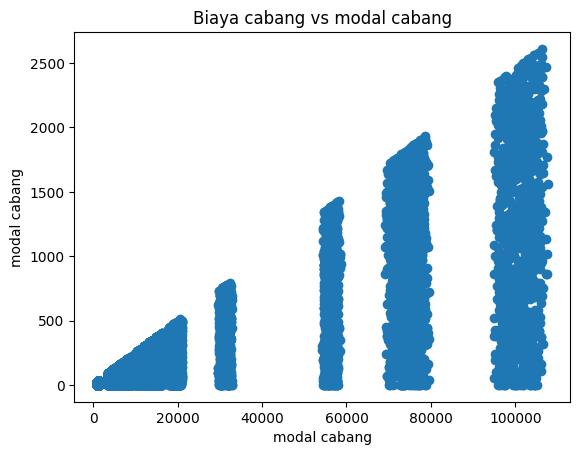

In [ ]:
plt.scatter(y,X)
plt.title(' Modal cabang vs Biaya cabang')
plt.xlabel('Biaya cabang')
plt.ylabel('Biaya cabang')

Potongan kode ini secara efektif membuat diagram sebar untuk memvisualisasikan hubungan antara dua variabel: modal cabang dan biaya cabang. Berikut ringkasan singkatnya:
plt.scatter(y, X): Membuat plot sebar pada sumbu x dan sumbu y.yX
plt.title(): Menetapkan judul untuk plot.
plt.xlabel(): Memberi label sumbu x.
plt.ylabel(): Memberi label sumbu y.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=51)

Baris kode ini secara efektif membagi kumpulan data Anda menjadi beberapa subset pelatihan dan pengujian, yang penting untuk membangun dan mengevaluasi model pembelajaran mesin. Berikut ringkasan singkatnya:
Fungsionalitas : membagi data Anda ke dalam set pelatihan dan pengujian.train_test_split()
Parameternya :
test_size=0.33: Menentukan bahwa 33% data akan digunakan untuk pengujian.
random_state=51: Memastikan reproduktifitas dengan mengendalikan benih acak.

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30162,)
(14856,)
(30162,)
(14856,)


Singkatnya, cuplikan kode ini secara efektif mencetak bentuk dataset pelatihan dan pengujian Anda untuk fitur ( ) dan variabel target ( ). Berikut ringkasan singkatnya:Xy
X_train.shape: Menampilkan dimensi set fitur pelatihan.
X_test.shape: Menampilkan dimensi set fitur pengujian.
y_train.shape: Menampilkan dimensi variabel target pelatihan.
y_test.shape: Menampilkan dimensi variabel target pengujian.

In [ ]:
linear = LinearRegression()
linear.fit(np.array(X_train).reshape(-1,1),y_train)

LinearRegression()

Kode ini secara efektif menginisialisasi dan melatih model regresi linier menggunakan data pelatihan Anda. Berikut ringkasan singkatnya:
linear = LinearRegression(): Membuat contoh model regresi linear.
linear.fit(...): Melatih model menggunakan fitur pelatihan ( ) dan nilai target ( ).X_trainy_train

In [ ]:
linear.coef_

array([53.54482961])

kode ini digunakan untuk mengakses koefisien model regresi linier yang disesuaikan di Scikit-learn. Berikut penjelasan terperinci tentang fungsinya:linear.coef_

In [ ]:
linear.intercept_

4869.390325287668

Kode ini digunakan dalam konteks model regresi linier yang dibuat dengan Scikit-learn. Berikut penjelasan terperinci tentang fungsinya:linear.intercept_Y_pred = linear.predict(np.array(X_test).reshape(-1,1))

In [ ]:
Y_pred = linear.predict(np.array(X_test).reshape(-1,1))

kedua baris kode ini penting untuk memahami dan memanfaatkan model regresi linier:
linear.intercept_: Mengambil intersepsi model yang dipasang, yang menunjukkan nilai yang diharapkan dari
kamu
kamuketika semua
X
Xnilainya nol.
Y_pred = linear.predict(...): Menghasilkan prediksi untuk data baru berdasarkan hubungan yang dipelajari dari data pelatihan.

In [ ]:
Y_pred

array([ 8617.52839802,  5940.2869175 ,  5940.2869175 , ...,
        9688.42499022, 17184.70113568,  9152.97669412])

Merupakan hasil prediksi dari model regresi linier Anda berdasarkan kumpulan data pengujian. Ini merupakan komponen penting dalam menilai kinerja model dan memahami hubungan dalam data.Y_pred


In [ ]:
score = r2_score(y_test,Y_pred)
score

0.6510825525757167

Baris kode ini menghitung dan menyimpan skor R-kuadrat untuk prediksi model regresi linier Anda:
score = r2_score(y_test, Y_pred): Menghitung seberapa baik prediksi model Anda cocok dengan nilai target sebenarnya.
Interpretasi : Lebih tinggi
R
2
R
2
 skor menunjukkan kesesuaian model Anda dengan data yang lebih baik.
Metrik ini penting untuk memahami seberapa baik kinerja model regresi linier Anda dan memberikan wawasan berharga tentang kemampuan prediktifnya!



Text(0, 0.5, 'Salary')

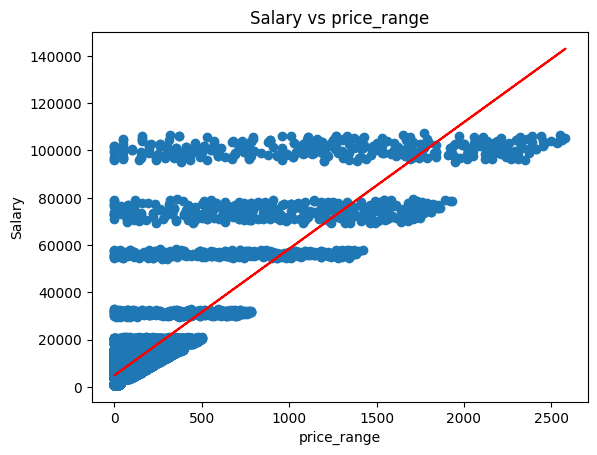

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test,Y_pred,color='red')
plt.title('Modal cabang vs Biaya Cabang')
plt.xlabel('Biaya cabang')
plt.ylabel('Biaya Cabang')

Kode ini secara efektif membuat diagram sebar dari titik data pengujian aktual dan melapisi diagram garis dari nilai prediksi dari model regresi linier Anda. Berikut ringkasan singkatnya:
plt.scatter(X_test, y_test): Menggambarkan titik data uji sesungguhnya sebagai diagram sebar.
plt.plot(X_test, Y_pred, color='red'): Merencanakan nilai prediksi sebagai plot garis merah.
plt.title(): Menetapkan judul untuk plot.
plt.xlabel(): Memberi label sumbu x.
plt.ylabel(): Memberi label sumbu y.